# Motivation of Tutorial

In this tutorial, an overview of Linear Models is given along with two approach of finding model parameters,namely, Pseudo Inverse of a Matrix and Gradient Descent. By doing so, I aim to give something back to the phenomen of free online education.

# Linear Models

In this tutorial, we give an overview of Linear Models.
+ **Linear Models**
    + Linear Regression
    + Linear Classification
    + Logistic Regression
    + Ridge Regression

+ **Learning parameters of models**
    + Pseudo Inverse
    + Gradient Descent
    + Maximum Likelihood Estimation
    

# Linear Models

Liner model refers to a model that is a linear combination of the input variables.

$$ s = \sum_{i=0} ^M w_i x_i = w^T \textbf{X}$$

where $M$ denotes the number of coefficents/parameters of the model. Note that $\epsilon$ noise is simply ignored.

In matrix form, the expression for the linear models is
$y= w^T \mathbf{X}$

$$\begin{bmatrix}
    y_{1} \\
    \dots \\
    y_{n}
\end{bmatrix}= \begin{bmatrix}
    w_1 & \dots & w_d
\end{bmatrix}
\begin{bmatrix}
    1 & \dots & x_{1d}\\
    \vdots & \dots &\vdots \\
    1& \dots & x_{nd}
\end{bmatrix} $$

+ 1s are simply for intercept in $X$ matrix

## What does actually mean to say Linear model ?!

+ Linear regression implements the following function as mentioned above
$$ \sum_{i=0} ^N w_i x_i $$
it is imporant to realize that this function is linear in the $\textbf{w}$ and $x_i$. As we go from the definition of a function to learning, being linear refers to be learn in the weights/parameters to be learned.

# How well does $ h(x)= w^T x $ approximate $ f(x) $ on a point ?


+ The quality of the approximation is evaluated via **Squared Error** ,i.e. the difference between real value and our estimation on a point.

$$ (h(x)-f(x))^2 $$

# How well does $ h(x)= \vec{w}^T x $ approximate $ f(x) $ on all seen data points ?

$$ E_{in} (w) = \frac{1}{N} \sum_{x=1} ^N (h(x_i)-f(x_i))^2 $$

$$E_{in} (w)= \frac{1}{N} ||\textbf{X}\vec{w} - \vec{y}||^2$$

Therefore, the goal is to find such $w$ parameters of a model so that $E_{in}$ is minimum. 

# How to minimize $E_{in}$ ?
+ Via Least Squares

+ Via Regularized Least Squares

+ Via Sequential Learning/ on-line algorithms
    + Gradient Descent
    + Stoachastic Gradient Descent

## Least Squares

$$ E_{in} (w)= \frac{1}{N} ||\textbf{X}\vec{w} - \vec{y}||^2$$

$$ \nabla E_{in} (w) = \frac{2}{N} \textbf{X}^T (\textbf{X}\vec{w} - \vec{y}) = 0 $$

$$ \textbf{X}^T \textbf{X} \vec{w} = \textbf{X}^T \vec{y}$$


$$\textbf{X}^\dagger = (\textbf{X}^T \textbf{X})^{-1} \textbf{X}^T $$

$$ \text{where  }  \textbf{X}^\dagger \text{is the }\textbf{pseudo-inverse } \text{of  }\textbf{X} $$


$$\vec{w}= \textbf{X}^\dagger \vec{y} $$



### Regularized Least Squares

$$\mathbf{w}= \big ( \lambda \mathbf{I} + \textbf{X}^T \textbf{X} \big)^{-1} \mathbf{X}^T \mathbf{y} $$

## Gradient Descent Algorithm

**EXPLAIN LATER**
a first-order iterative optimization algorithm for finding the minimum of a function

# Let's implement it

## Dot Product

In [1]:
import numpy as np
features = np.array([1,3,5]).reshape((1, 3))
weights= np.array([4,-2,-1]).reshape((3,1))

print(features@weights==np.dot(features,weights))
features@weights==features.dot(weights)

[[ True]]


array([[ True]])

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import math
import seaborn as sns
sns.set(style="darkgrid")
from sklearn.metrics import mean_squared_error
np.random.seed(2)

In [3]:
class DataGeneratingProcess(object):
    def __init__(self,f=lambda x: 5,noise=0):
        # This is the true unknown function we are trying to approximate
        self.f=f
        self.s=noise # noise variance.
        self.X=None
        self.y=None
    
    def generate_regression(self,N,T=(-4,4)):
        # Sample some input points and noisy versions of the function evaluated at  these points.
        self.X = np.random.uniform(T[0], T[1], size=(N,1))
        self.y = self.f(self.X) + self.s*np.random.randn(N)
        return self.X,self.y

    def generate_classification(self,N,T=(-4,4)):
        # Sample some input points and noisy versions of the function evaluated at  these points.
        self.X = np.random.uniform(T[0], T[1], size=(N,1))
        #TODO include noise latter
        self.y = self.f(self.X) #+ self.s*np.random.randn(N)
        return self.X,self.y
    
    def plot(self):
        plt.scatter(self.X, self.y)
        plt.xlabel('observations')
        plt.ylabel('unknown function')
        plt.axis('tight')
        plt.show()

In [213]:
class LinearModel(object):
    
    def __init__(self,num_epoch=100,gradient_update=0.01):
        self.weights=None
        self.num_epoch=num_epoch
        self.gradient_update=gradient_update
        
    def gradient_descent(self,X_t,y):
        # initialize a list to store the loss value for each epoch
        lossHistory = []

        # loop over the desired number of epochs
        for epoch in np.arange(0, self.num_epoch):
            # take the dot product between our features `X` and the
            # weight matrix `W`, then pass this value through the
            # sigmoid activation function, thereby giving us our
            # predictions on the dataset
            #preds = sigmoid_activation(X.dot(W))
            preds =X_t.dot(self.weights)

            # now that we have our predictions, we need to determine
            # our `error`, which is the difference between our predictions
            # and the true values
            error = preds - y

            # given our `error`, we can compute the total loss value as
            # the sum of squared loss -- ideally, our loss should
            # decrease as we continue training
            loss = np.sum(error ** 2)
            lossHistory.append(loss)
            #print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

            # the gradient update is therefore the dot product between
            # the transpose of `X` and our error, scaled by the total
            # number of data points in `X`
            gradient = X_t.T.dot(error) / X_t.shape[0]

            # in the update stage, all we need to do is nudge our weight
            # matrix in the opposite direction of the gradient (hence the
            # term "gradient descent" by taking a small step towards a
            # set of "more optimal" parameters
            self.weights += -self.gradient_update * gradient
        self.weights=np.around(self.weights,5)
        print('Learned weights: ',self.weights)
        
    def fit_regression(self,X,y,init_pseudo_inverse=True):
        if init_pseudo_inverse:
            # Insert a column of 1's as the first entry in the feature vector.
            # Hence, we can treat the bias as a parameter *within* the weight matrix rather than an entirely separate variable
            X_t = np.column_stack( (np.ones((len(X),1)) , X ) ) 
            self.weights = np.dot( np.linalg.pinv(X_t), y)
        else:
            X_t= np.column_stack( (np.ones((len(X),1)) , X ) )
            self.weights = np.random.uniform(size=(X_t.shape[1],))
        print('Weights are initialized with pseudo inverse:',init_pseudo_inverse)
        self.gradient_descent(X_t,y)
        
        print('Mean squared Error Logistic Regression: ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
        
    def fit_polynomial(self,X,y,d=3,plotting=False):
        print('Fitting polynomials ',d)
        p = np.poly1d(np.polyfit(X, y, d))
        print('Mean squared Error Logistic Regression: ',mean_squared_error(p(X),y))
        
        if plotting:
            plt.scatter(X, y)
            _=np.linspace(X.min(), X.max(), num=10)

            plt.plot(_, p(_),c='r')
            plt.xlabel('observations')
            plt.ylabel('Outputs')
            plt.axis('tight')
            plt.show()
        
    def fit_pseudo_inverse(self,X,y):
        # 1s inserted into X as we have to also learn the intercept of function
        X_t = np.column_stack( (np.ones((len(X),1)) , X ) ) 
        self.weights = np.dot( np.linalg.pinv(X_t), y) # weights 
        print( 'w0 = %.6f, w1 = %.6f ' %(self.weights[0],self.weights[1]) ) 
        print('Mean squared Error of Least Squares: ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
    
    def fit_regularized_least_squares(self,X,y,lambda_=0):
        """
        #np.all(np.dot(X_t.T,X_t)==X_t.T@X_t)
        #(X_t.T@X_t)**-1==(1/(X_t.T@X_t))
        #(X_t.T@X_t)**-1 not equal =! np.linalg.inv(np.dot(X_t.T,X_t))

        ## our scratch and pinv is almost same!
        #pinv_scratc=np.linalg.inv(np.dot(X_t.T,X_t)).dot(X_t.T)
        #np.allclose(pinv_scratc,np.linalg.pinv(X_t))
        """
        
        X_t = np.column_stack( (np.ones((len(X),1)) , X ) )
        I=np.identity(X_t.shape[1])

        pinv_scratc=np.linalg.inv(lambda_*I+np.dot(X_t.T,X_t)).dot(X_t.T)
        self.weights=np.dot(pinv_scratc,y)
        print( 'w0 = %.6f, w1 = %.6f ' %(self.weights[0],self.weights[1]) ) 
        print('Mean squared Error of Regularized Least Squares : ',mean_squared_error(self.weights[0] + self.weights[1]*X,y))
    
    def plot(self,X):
        
        plt.plot(X, self.weights[0] + self.weights[1]*X,c='r')# label='h(x) = %.2f + %.2f x' %(w[0], w[1]))
        plt.scatter(X, y)
        plt.xlabel('observations')
        plt.ylabel('Outputs')
        plt.axis('tight')
        plt.show()

w0 = 5.000000, w1 = -0.000000 
Mean squared Error of Least Squares:  7.888609052210118e-31


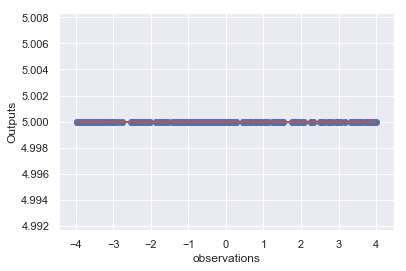

Weights are initialized with pseudo inverse: True
Learned weights:  [5. 0.]
Mean squared Error Logistic Regression:  0.0
Weights are initialized with pseudo inverse: False
Learned weights:  [ 5. -0.]
Mean squared Error Logistic Regression:  0.0
w0 = 4.975034, w1 = -0.000678 
Mean squared Error of Regularized Least Squares :  0.0006210372734443493


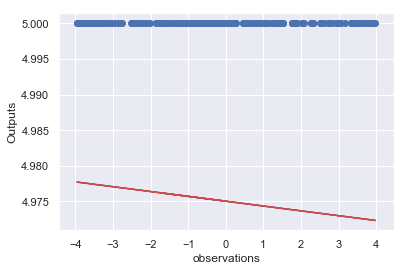

In [214]:
g=DataGeneratingProcess()
X,y=g.generate_regression(200)
#g.plot()

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
#model.plot(X.copy())

model=LinearModel(num_epoch=20000)
model.fit_regression(X.copy(),y.copy(),init_pseudo_inverse=False)
#model.plot(X.copy())

model=LinearModel()
model.fit_regularized_least_squares(X.copy(),y,lambda_=1)
model.plot(X.copy())

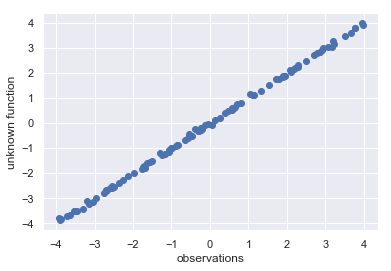

w0 = -0.011149, w1 = 0.997999 
Mean squared Error of Least Squares:  0.0025516588307597753


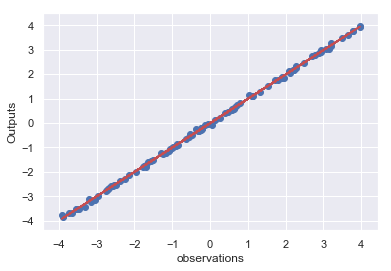

Weights are initialized with pseudo inverse: True
Learned weights:  [-0.01115  0.998  ]
Mean squared Error Logistic Regression:  0.0025516588385867452


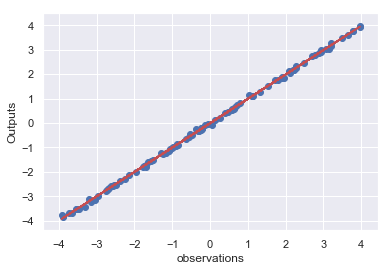

Weights are initialized with pseudo inverse: False
Learned weights:  [0.04654 0.99886]
Mean squared Error Logistic Regression:  0.005868931719328353


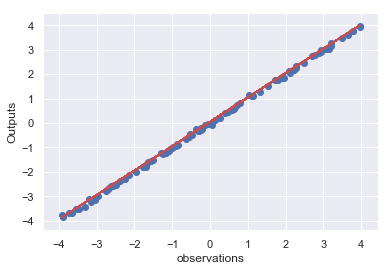

In [215]:
g=DataGeneratingProcess(f=lambda x:np.array(x).flatten(),noise=0.06)
X,y=g.generate_regression(100)
g.plot()

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
model.plot(X.copy())

model=LinearModel(num_epoch=100)
model.fit_regression(X,y,init_pseudo_inverse=False)
model.plot(X.copy())


It is important to understand that the behaviour of learned weights/regression coefficents/weights. More specifically, if $w_1$ positive, then we expect the output to increase as the input increases. Hence, the input and output is positively correlated.

In [216]:
g=DataGeneratingProcess(f = lambda x: (x**2).flatten())
X,y=g.generate_regression(100)

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
#model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
#model.plot(X.copy())

model=LinearModel(num_epoch=100)
model.fit_regression(X.copy(),y.copy(),init_pseudo_inverse=False)
#model.plot(X.copy())


model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=1)

model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=2)



w0 = 4.839415, w1 = -0.000564 
Mean squared Error of Least Squares:  22.421319490470275
Weights are initialized with pseudo inverse: True
Learned weights:  [ 4.83942e+00 -5.60000e-04]
Mean squared Error Logistic Regression:  22.421319490567015
Weights are initialized with pseudo inverse: False
Learned weights:  [3.42105 0.01445]
Mean squared Error Logistic Regression:  24.43290143164878
Fitting polynomials  1
Mean squared Error Logistic Regression:  22.421319490470275
Fitting polynomials  2
Mean squared Error Logistic Regression:  4.923676037920557e-29


In [217]:
g=DataGeneratingProcess(f = lambda x: (np.sin(x)).flatten())
X,y=g.generate_regression(1000,T=(-3,3))
#g.plot()

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
#model.plot(X.copy())

model=LinearModel()
model.fit_regression(X.copy(),y.copy())
#model.plot(X.copy())

model=LinearModel(num_epoch=100)
model.fit_regression(X.copy(),y.copy(),init_pseudo_inverse=False)
#model.plot(X.copy())

w0 = 0.004123, w1 = 0.329635 
Mean squared Error of Least Squares:  0.1635837972938394
Weights are initialized with pseudo inverse: True
Learned weights:  [0.00412 0.32963]
Mean squared Error Logistic Regression:  0.16358379737104545
Weights are initialized with pseudo inverse: False
Learned weights:  [0.35518 0.35712]
Mean squared Error Logistic Regression:  0.28889273633419105


In [218]:
model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=2)

model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=3)

Fitting polynomials  2
Mean squared Error Logistic Regression:  0.16356775117988592
Fitting polynomials  3
Mean squared Error Logistic Regression:  0.003143734451055668


In [219]:
g=DataGeneratingProcess(f = lambda x: (x**2).flatten())
X,y=g.generate_regression(100)

model=LinearModel()
model.fit_pseudo_inverse(X.copy(),y.copy())
#model.plot(X.copy())

model=LinearModel()
model.fit_polynomial(X.copy().flatten(),y.copy(),d=2)

w0 = 5.741653, w1 = 0.123452 
Mean squared Error of Least Squares:  23.428247346270712
Fitting polynomials  2
Mean squared Error Logistic Regression:  2.9572650594669393e-29


## The Gaussian distribution

$$ \mathcal{N}(x|\mu,\,\sigma^{2}) =\frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$ where  
+ $\mu$ is expected value/mean
+ $\sigma$ is standard devation of mean
+ $\sigma^2$ is the variance.
+ The recoprocal of the variance as $\beta=\frac{1}{\sigma^2}$ is called the precision.

From the from above, we see that the Gaussian distribution satisfies

$$ \mathcal{N}(x|\mu,\sigma^2) > 0$$ which is also shown below

### Classification Problem

Learned weights:  [[0.50101]
 [0.64908]]


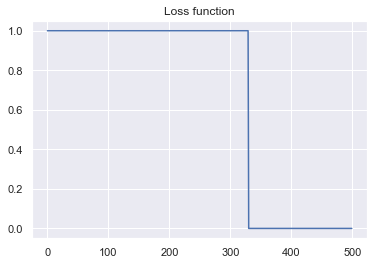

In [12]:
mu, sigma, N = 1, 0.1,10000 # mean and standard deviation
x = np.random.normal(mu, sigma, N)

np.all(x>0)## all simulated variables from given Gaussian greater than o.

True

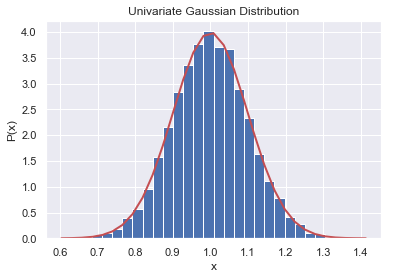

In [13]:

gaussian=lambda x,mu,sigma: 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (x - mu)**2 / (2 * sigma**2) ) 
count, bins, ignored = plt.hist(x, 30, density=True)

plt.plot(bins,gaussian(bins,mu,sigma),linewidth=2, color='r')

plt.title('Univariate Gaussian Distribution')
plt.ylabel('P(x)')
plt.xlabel('x')
plt.show()

+ the Gaussian is normalized so that following holds;

$$ \int_{-\infty} ^{+\infty} \mathcal{N}(x|\mu,\sigma^2) \, dx=1$$

So, we can find expectations of functions of $x$ under the Gaussian distribution. In particular, the average value of $x$ is given by

$$\mathbb{E}[x]= \int_{-\infty} ^{+\infty} \mathcal{N}(x|\mu,\sigma^2) \, x \, dx=\mu $$

Similarly, for the second order, following holds;

$$\mathbb{E}[x^2]= \int_{-\infty} ^{+\infty} \mathcal{N}(x|\mu,\sigma^2) \, x^2 \, dx=\mu^2 + \sigma^2$$

Hence, the variance of $x$ is given by

$$ var[x]= \mathbb{E}[x^2]+ \mathbb{E}[x]^2=\sigma^2$$


The Gaussian distribution defined over a D-dimensional vector $x$ of continous variables is given by 


$$ \mathcal{N}(x|\boldsymbol{\mu},\, \mathbf{\Sigma}) =\frac{1}{\sqrt{(2 \pi)^{D/2} |\mathbf{\Sigma}|^{1/2} }} \, \mathbf{exp} \Big\{-\frac{1}{2}(x-\boldsymbol{\mu})^T  \mathbf{\Sigma}^{-1} \big(x- \boldsymbol{\mu} \big) \Big \}$$ 

where the D-dimensional vector $\boldsymbol{\mu}$ is called the mean, the $D \times D $ matrix $\boldsymbol{\Sigma}$ is called the covariance and $|\boldsymbol{\Sigma}|$ denotes the determinal of $\boldsymbol{\Sigma}$



Suppose that we have a data set of observations $\mathbf{x}=(x_1,...,2_N)^T$ each of wich is a scalar variable $x$. We shall suppose that the observations are drawn independently from a Gaussian distribution whose mean $\mu$ and variance $\sigma^2$ are unknown. We would like to determine these parameters from the data set.



Data points that are drawn independently from the same distribution are said to be independent and identically distributed, which is often abbreviated to i.i.d. 

We have seen that the joint probability of two independent events is given by the product of the marginal probabilities for each event separately. 

Because our data set $x$ is i.i.d., we can therefore write the probability of the data set, given $\mu$ and $\sigma^2$, in the form

$$ p(\mathbf{x} | \mu,\sigma^2)=\prod_{n=1} ^N \mathcal{N}(x_n | \mu, \sigma^2)$$

One common criterion for determining the parameters in a probability distribution using an observed data set is to find the parameter values that maximize the likelihood function. For now our goal is to find such $\mu$ and $\sigma^2$ so that $p(\mathbf{x} | \mu,\sigma^2)$ is maximized.
So the goal is to determine values for the unknown parameters
$\mu$ and $\sigma^2$ in the Gaussian by maximizing the likelihood function written above.





In practice, it is more convenient to maximize the log of the likelihood function. Because the logarithm is a monotonically increasing function of its argument, maximization of the log of a function is equivalent to maximization of the function itself. 

Taking the log not only simplifies the subsequent mathematical analysis, but it also helps numerically because the product of a large number of small probabilities can easily underflow the numerical precision of the computer, and this is resolved by computing instead the sum of the log probabilities.


$$p(\mathbf{x}|\mu,\sigma) = \prod_{n=1} ^N \frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(x_i- \mu)^2}$$




$$ln \Big ( p(\mathbf{x}|\mu,\sigma) \Big )= \sum_{n=1} ^N ln \Bigg (\frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(x_n- \mu)^2} \Bigg )$$


Often $ln \Big ( p(\mathbf{x}|\mu,\sigma) \Big )$ is represented by
$\mathcal{L}(\mu,\sigma)$.



$$\mathcal{L}(w,\sigma)= - \frac{1}{2\sigma^2} \sum_{n=1} ^N (x_n-\mu )^2  - \frac{N}{2} \, ln \, (\sigma^2) - \frac{N}{2} \, ln \, (2\pi)$$

Maximizing log likelihood function with respect to $\mu$ we obtain the

$$ \mu_{ML}= \frac{1}{N} \sum_{n=1} ^N x_n$$
which is the sample mean, i.e., the mean of the observed values $ \{ x_n \}$. Similarly maximizing with respect to $\sigma^2$, we obtain the maximum likelihood solution for the variance form

$$ \sigma^2 _{ML} = \frac{1}{N} \sum_{n=1} ^N (x_n-\mu_{ML})^2$$

which is the sample variance measured with respect to the sample mean $\mu_{ML}$.


+ the maximum likelihood approach systematically underestimates the variance of the distribution. This is an example of a phenomenon called bias and is related to the problem of over-fitting encountered in the context of polynomial curve fitting.

$$ \mathbb{E}[\mu_{ML}]=\mu$$

$$ \mathbb{E}[\sigma_{ML} ^2 ]= \big(\frac{N-1}{N} \big) \sigma^2$$

On average the maximum likelihood estimate will obtain the correct mean but will underestimate the true variance by a factor of $(N-1)/N$.


Note that the bias of the maximum likelihood solution becomes less significant as the number N of data points increases, and in the limit 
$N \rightarrow \infty$ the maximum likelihood solution for the variance equals the true variance of the distribution that generated the data. 


In practice, for anything other than small N, this bias will not prove to be a serious problem. However, throughout this book we shall be interested in more complex models with many parameters, for which the bias problems associated with maximum likelihood will be much more severe.

In fact, as we shall see, the issue of bias in maximum likelihood lies at the root of the over-fitting problem that we encountered earlier in the context of polynomial curve fitting.


## The likelihood for liner regression


Let us assume that, given the value of $x$, the corresponding value of t has a Gaussian distribution with a mean equal to the value $y(x,w)$.
Let us assume that each label $t_i$ is Gaussian distributed with mean 

$$ p(t|x,w,\beta) = \mathcal{N}(t | y(x,w),\beta^{-1})$$

where $\beta$ is the inverse variance of the distribution,i.e., $\beta=\frac{1}{\sigma^2}$ called the precision.


The goal is to to determine the values of the unknown
parameters $w$ and $\beta$ by maximum likelihood. If the data are assumed to be drawn independently from the distribution then the likelihood function is given by


$$ p(\mathbf{t}|\mathbf{x},\mathbf{w},\beta)=\prod_{n=1} ^N \mathcal{N} \big ( t_n \, | \,  y(x_n ,\mathbf{w}), \beta^{-1} \big) $$.



$$ ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)= -\frac{\beta}{2} \sum_{n=1} ^N \{ y(x_n,\mathbf{w})-t_n\}^2 + \frac{N}{2}ln \, (\beta) - \frac{N}{2} ln (2\pi) $$ 


Consider first the determination of the maximum likelihood solution for the polynomial coefficents, $\mathbf{w}_{ML}$. $\mathbf{w}_{ML}$ determined by maximizing above equation with respect to $\mathbf{w}$. 

+ Hence we can omit $\frac{N}{2}ln(\beta)$ and $- \frac{N}{2}ln(2\pi)$ as they do not depend on $\mathbf{w}$.


$$ ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)= -\frac{\beta}{2} \sum_{n=1} ^N \{ y(x_n,\mathbf{w})-t_n\}^2$$ 

+ We note that scaling the log likelihood by a positive constant coefficent does not alter the location of the maximim with respect to $w$ and so we can replace the coeffocent $\beta /2$ with $1/2$.






$$ ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)= -\frac{1}{2} \sum_{n=1} ^N \{ y(x_n,\mathbf{w})-t_n\}^2$$ 



+ Finally instead of maximizin the log likelihood we can equivalently minimize the negative log likelihood.

$$E_D (\mathbf{w})= \frac{1}{2} \sum_{n=1} ^N \{y(x_n \mathbf{w})-t_n) \}^2$$


Maximizing likelihood is equivalent, so far as to detemrmining w is concerned, to minimizing the sum of squares error function.







The gradient of the log likelihood function takes the following form

$$ \, \frac{\partial ln \, p (\mathbf{t}|\mathbf{x},\mathbf{w},\beta)}{\partial W}=  \sum_{n=1} ^{N} \{t_n - \mathbf{w}^T  x_n\} x_n ^T$$

Setting the gradient to zero gives us


$$ 0= \sum_{n=1} ^{N} t_n x_n^T - w^T \big( \sum_{n=1} ^{N} x_n x_n^T \big)$$

Solving for $\mathbf{w}$ we obtain

$$ \mathbf{w}_{ML}= ( \mathbf{x}^T \mathbf{x} )^{-1} \mathbf{x} ^T \mathbf{t} $$

The quantitiy is known as the Moore-Pensore pseudo-inverse of the matrix $\mathbf{x}$.


## The likelihood for liner regression

Let us assume that each label $y_i$ is Gaussian distributed with mean $\mu=w^T x_i$ and variance $\sigma^2$.

$$ y_i=\mathcal{N}(w^T x_i,\sigma^2)$$
$$ y_i=w^T x_i+\mathcal{N}(0,\sigma^2)$$






$$ \mathbf{P}(Y|X,\Theta)= \mathcal{N}(y|\mu(x),\sigma^2(x))$$In the simplest case, we assume $\mu$ is a linear function of $x$, $\mu=w^Tx$ and $\Theta=(w,\sigma^2)$. For example, suppose the input is 1 dimensional and we can represent the expected respond as follows: 

$$ \mu(x)=w_0 + w_1 x = w^T x$$ where $w_0$ is the intercept or bias term while w_1 the slope hence x=(1,x) above.

hence

$$ \mathbf{P}(Y|X,\Theta)= \prod_{i=1} ^n \mathbf{P}(y_i |x_i,\Theta)$$


+ Goal is to ***tweak*** $\Theta$ so that probabilitiy of observing responses $Y$ given a dataset $X$ and $\Theta$ is maximized.


As we assume that each data point comes from Gaussian distribution, we multuply gaussian probabties of each point as follows

***equivalently*** likelihood function is in the following form
$$\mathbf{P}(Y|X,\vec{w},\sigma) = \prod_{i=1} ^n \frac{1}{\sqrt{2 \pi \sigma^2}} \mathbf{e}^{-\frac{1}{2\sigma^2}(y_i- w^T x_i)^2}$$
where $w^T x_i=\mu(x_i)$





It is very similar to cost function $ J(\vec{w})=\sum_{i=1} ^n (y_i - w^T x_i)^2 $. 

+ Hence, as we maximize the likelihood function, we minimize cost function



Moreover, we could write everything in matrix notation as follows 

$$= \prod_{i=1} ^n (2\pi \sigma^2)^{-1/2} \, \mathbf{e}^{-\frac{1}{2\sigma^2}(y_i- w^T x_i)^2}$$


$$= (2\pi \sigma^2)^{-n/2} \, \mathbf{e}^{-\frac{1}{2\sigma^2}\sum_{i=1}(y_i- w^T x_i)^2}$$

$$\mathbf{P}(Y|X,w,\sigma) = (2\pi \sigma^2)^{-n/2} \, \mathbf{e}^{-\frac{1}{2\sigma^2}(Y- w^T X)^T (Y- w^T X)}$$



When we see the data, we do not known the true parameters $\vec{w}$,
but any guess at them gives us a probability density. Hence we aim to increase the probabilitiy densitiy function or ***increase the likelyhood***. Due to mathematical convenient ( not multplying very small probabilities), we work with ***log-likelihood*** function as log is monotonic function.


$$\mathcal{L}(w,\sigma) = \sum_{i=1} ^n log \mathbf{P}(y_i |x_i,\vec{w},\sigma)$$


$$\mathcal{L}(w,\sigma)= - \frac{n}{2}log2\pi -n log(\sigma) - \frac{1}{2 \sigma^2} \sum_{i=1} ^n (y_i-(\vec{w}^T x_i))^2$$

The maximum likelihood of $w$ is
$$\mathcal{L}(w,\sigma)= - \frac{n}{2}log(2\pi\sigma^2)- \frac{1}{2 \sigma^2} \big(Y-(\vec{w}^T X)\big) \big(Y-(\vec{w}^T X) \big)$$

if you take the derivation of the above function with respect to w

$$ \frac{\partial \mathcal{L(W)}}{\partial W}=0 - \frac{1}{2\sigma^2}
[0-2X^T Y + 2X^T X W] $$

equating to 0 gives us $w_{ML}=(X^TX)^{-1}X^TY$


$$ \frac{\partial \mathcal{L(\sigma)}}{\partial \sigma}=1/n \sum_{i=1} ^n (y_i-w^T x_i)^2$$



In [14]:
# http://dfm.io/emcee/current/user/line/

In [15]:

# Choose the "true" parameters.
m_true = -0.9594
b_true = 4.294
f_true = 0.534

# Generate some synthetic data from the model.
N = 100
x = np.sort(10*np.random.rand(N))
y = m_true*x+b_true

In [16]:
y+=np.abs(f_true*y) * np.random.randn(N)

In [17]:
yerr = 0.1+0.5*np.random.rand(N)
y += yerr * np.random.randn(N)

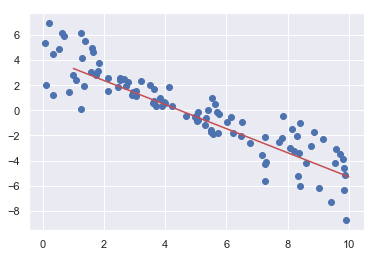

In [18]:
points=np.linspace(1, 10, num=1000)
plt.scatter(x,y)
plt.plot(points,m_true*points+b_true,c='r')

The true model is shown as the thick grey line and the effect of the underestimated uncertainties is obvious when you look at this figure. The standard way to fit a line to these data (assuming independent Gaussian error bars) is linear least squares. Linear least squares is appealing because solving for the parameters—and their associated uncertainties—is simply a linear algebraic operation. Following the notation in Hogg, Bovy & Lang (2010), the linear least squares solution to these data is

In [19]:
A = np.vstack((np.ones_like(x), x)).T
C = np.diag(yerr * yerr)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [20]:
m_ls

-1.048502181590795

In [21]:
b_ls

4.873692247497791

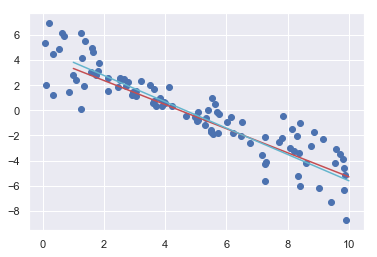

In [22]:
points=np.linspace(1, 10, num=1000)
plt.scatter(x,y)
plt.plot(points,m_true*points+b_true,c='r')
plt.plot(points,m_ls*points+b_ls,c='c')

In [23]:
def lnlike(theta, x, y, yerr):
    m, b, lnf = theta
    model = m * x + b
    inv_sigma2 = 1.0/(yerr**2 + model**2*np.exp(2*lnf))
    return -0.5*(np.sum((y-model)**2*inv_sigma2 - np.log(inv_sigma2)))


In [24]:
import scipy.optimize as op
nll = lambda *args: -lnlike(*args)
# next time I could implement gradient ascent for given params!
result = op.minimize(nll, [m_true, b_true, np.log(f_true)], args=(x, y, yerr))
m_ml, b_ml, lnf_ml = result["x"]

It’s worth noting that the optimize module minimizes functions whereas we would like to maximize the likelihood. This goal is equivalent to minimizing the negative likelihood (or in this case, the negative log likelihood). The maximum likelihood result is plotted as a solid black line—compared to the true model (grey line) and linear least squares (dashed line)—in the following figure:

## Maximum likelihood estimation linear regression

In [25]:
x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = -3.5
c = 0.0
y = (a*(x**2)) + (b*x) + c

#   let's add noise to the data
#   np.random.normal(mean, standardDeviation, num)
noise = np.random.normal(0, 10., 100)
y = y+noise

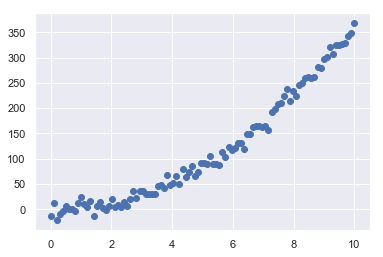

In [26]:
plt.scatter(x,y)

Linear regression is generally of some form

$$ \mathbf{Y}=\mathbf{X}w+\mathbf{r}$$

for a true function $\mathbf{Y}$,  the matrix of independent variable  $\mathbf{X}$, the model coefficents $w$, and some residual difference between the true model and the model $r$.

$$\mathbf{r}=\mathbf{Y}-\mathbf{X}w$$

If we assume that the data to be of an independent and identically distributed sample and the residual $r$ is from a Gaussian distribution, then we will get the folloding poribabilitiy densitiy function $f$.



$$ f(x|,\mu,\sigma^2)= (2 \pi \sigma^2)^{-n/2} \mathbf{e}^{-\frac{1}{2\sigma^2}(x-\mu)^2}$$


If we substitute the residual into the equation, and assume that the residual will have a mean of zero ($\mu=0$) we get

$$ f(r|0,\sigma^2)= (2 \pi \sigma^2)^{-n/2} exp\big(-\frac{(y-xw)^2}{2\sigma^2}\big)$$

The likelihood function $\mathcal{L}$ is defined 

$$ \mathcal{L}(w|x_1,...,x_n)=\prod_{i=1} ^n f(x_i|w)$$ 

When we substitue the probabilitiy densitiy function into the definiton of maximim likelihood func we get

When we substitue the probabilitiy densitiy function into the definiton of maximim likelihood func we get


$$ \mathcal{L}(w|x_1,...,x_n)=(2 \pi \sigma^2)^{-n/2} exp\big(-\frac{(Y-XW)^T (Y-XW)}{2\sigma^2}\big)$$ 



It is practical to work with the log-likelihood as opposed to the likelihood equation as the likelihood equation can be nearly zero. In Python we have created a function which returns the log-likelihood value given a set of ‘true’ values ($Y$) and a set of ‘guess’ values $XW$.

In [27]:
#   define a function to calculate the log likelihood
def calcLogLikelihood(guess, true, n):
    error = true-guess
    sigma = np.std(error)
    f = ((1.0/(2.0*math.pi*sigma*sigma))**(n/2))* \
        np.exp(-1*((np.dot(error.T,error))/(2*sigma*sigma)))
    return np.log(f)

Optimization is used to determine which parameters $W$ maximize the log-likelihood function.

The optimization problem is expressed below.

$$ \{W_{MLE} \} \subseteq  \{ arg max ln \Big( \mathcal{L}( W|x_1,...,x_n) \Big) \} $$

In [28]:
#   define my function which will return the objective function to be minimized
def myFunction(var):
    #   load my  data
    [x, y] = np.load('myData.npy')
    yGuess = (var[2]*(x**2)) + (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*f)

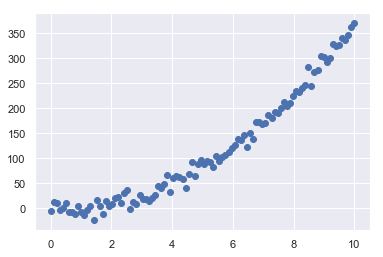

In [29]:
import numpy as np
import math
#   pefrom least squres fit using scikitlearn
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from scipy.optimize import minimize


x = np.linspace(0.0,10.0, num=100)
a = 4.0
b = -3.5
c = 0.0
y = (a*(x**2)) + (b*x) + c

#   let's add noise to the data
#   np.random.normal(mean, standardDeviation, num)
noise = np.random.normal(0, 10., 100)
y = y+noise

plt.scatter(x,y)


In [30]:
#   define my function which will return the objective function to be minimized
def myFunction(var):
    yGuess = (var[2]*(x**2)) + (var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*f)

#   define my function which will return the objective function to be minimized
def myFunction2(var):
    yGuess =(var[1]*x) + var[0]
    f = calcLogLikelihood(yGuess, y, float(len(yGuess)))
    return (-1*f)


Optimization terminated successfully.
         Current function value: 490.522544
         Iterations: 15
         Function evaluations: 72
         Gradient evaluations: 18


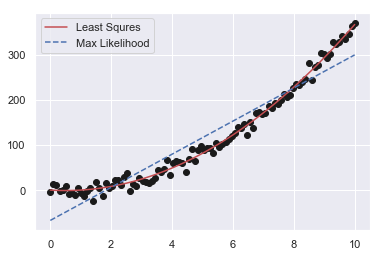

In [31]:
#    Let's pick some random starting points for the optimizaiton    
nvar = 2
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5

#   let's maximize the liklihood (minimize -1*max(likelihood)
res = minimize(myFunction2, var, method='BFGS',
                options={'disp': True})
                
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x[:, np.newaxis], y)
coefs = model.named_steps['linear'].coef_

#   plot the data and model fits
plt.figure()
plt.plot(x,y, 'ok')
plt.plot(x,model.predict(x[:,np.newaxis]), '-r', label='Least Squres')
plt.plot(x,+ (res.x[1]*x) + res.x[0], '--b', label='Max Likelihood')
plt.grid(True)
plt.legend(loc=2)
plt.show()
                
    

Optimization terminated successfully.
         Current function value: 375.500035
         Iterations: 14
         Function evaluations: 130
         Gradient evaluations: 26


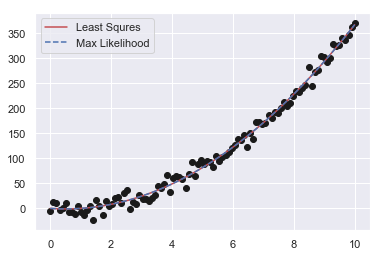

In [32]:
#    Let's pick some random starting points for the optimizaiton    
nvar = 3
var = np.zeros(nvar)
var[0] = -15.5
var[1] = 19.5
var[2] = -1.0

#   let's maximize the liklihood (minimize -1*max(likelihood)
res = minimize(myFunction, var, method='BFGS',
                options={'disp': True})
                
#   pefrom least squres fit using scikitlearn
model = Pipeline([('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression(fit_intercept=False))])

model = model.fit(x[:, np.newaxis], y)
coefs = model.named_steps['linear'].coef_

#   plot the data and model fits
plt.figure()
plt.plot(x,y, 'ok')
plt.plot(x,model.predict(x[:,np.newaxis]), '-r', label='Least Squres')
plt.plot(x,(res.x[2]*(x**2)) + (res.x[1]*x) + res.x[0], '--b', label='Max Likelihood')
plt.grid(True)
plt.legend(loc=2)
plt.show()

                
    

In [10]:

class LogisticReg(LinearModel):

    def __init__(self,num_epoch=50):
        LinearModel.__init__(self,num_epoch)
        self.lossHistory=[]
    
    def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

    def fit(self,X,y):
        X_t= np.column_stack( (np.ones((len(X),1)) , X ) )
        self.weights = np.random.uniform(size=(X_t.shape[1],1))
        self.gradient_descent(X_t,y)
        
    def predict(self,X):
        X_t= np.column_stack( (np.ones((len(X),1)) , X ) )
        return self.activation_func(X_t.dot(self.weights))
            
        
    def gradient_descent(self,X_t,y):

        for epoch in np.arange(0, self.num_epoch):
            

            activations = self.sigmoid(X_t@self.weights)

            preds=(0.5<activations).astype(int)
            
            error=preds-y
            loss=np.sum(np.absolute(error))
   
            self.lossHistory.append(loss)
            #print("[INFO] epoch #{}, loss={:.7f}".format(epoch + 1, loss))

            gradient = X_t.T.dot(error) / X_t.shape[0]

            self.weights += -self.gradient_update * gradient
        
        self.weights=np.around(self.weights,5)
        print('Learned weights: ',self.weights)
        
        
g=DataGeneratingProcess(f = lambda x:(x.mean()<x).astype(int))
X,y=g.generate_classification(100,T=(-10,10))
#g.plot()

lr=LogisticReg(500)
lr.fit(X.copy(),y.copy())

plt.title('Loss function')
plt.plot(lr.lossHistory)

### Lets see in action

Observed datapoints... a random variable $X$ that is assumped to be normally distributed some mean $\mu$ and standard deviation $\sigma$. 

Our goal is to find estimations of $\mu$ and $\sigma$ from our sample which accurately represent the true $X$, not just the samples we’ve drawn out.

+ Let's say we have a set of data points and we find out that $\mu=3$ and $\sigma=1$. Then we randomly sample a datapoint from our set of datapoints and lets say that is $3$. Finally we would like to know what is the probabilitiy of observing 3 from our given set of datapoints 

In [33]:
from scipy.stats import norm
norm.pdf(3,3,1)

0.3989422804014327

+ Let's say we have a set of data points and we find out that $\mu=5$ and $\sigma=1$. Then we randomly sample a datapoint from our set of datapoints and lets say that is $3$. Finally we would like to know what is the probabilitiy of observing 3 from our given set of datapoints 

In [34]:
norm.pdf(3,5,2)

0.12098536225957168

Observing $3$ in a set of datapoints whose $\mu=3$ and $\sigma=1$ is intiatively more probable. Let's assumed that we are given the following datapoints which are sampled from a function that we do not know but strive to know.

In [35]:
X=[4, 5, 7, 8, 8, 9, 10, 5, 2, 3, 5, 4, 8, 9]
y=np.zeros(len(X))

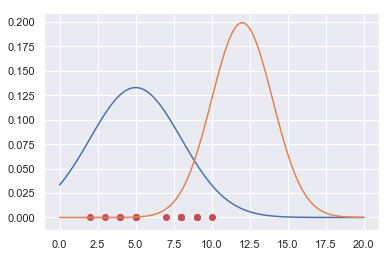

In [36]:
points=np.linspace(0, 20, num=100)

prob1=lambda x:norm.pdf(x,5,3)
prob2=lambda x:norm.pdf(x,12,2)

plt.plot(points,prob1(points))
plt.plot(points,prob2(points))
plt.scatter(X,y,c='r')

Distribution in blue seems to be better at describing datapoints that other distribution. In otherwords,

Given datapoints are more probable to be sampled from blue distrivution rather than orange one.


We would like to find $P(2, 3, 4, 5, 7, 8, 9, 10| \mu, \sigma)$.
So we estimate $ \Theta$ which is $\mu$ and $\sigma$.

More specifically, we would like to maximize the likelihood $\Theta$

In [37]:
# Compare the likelihood of the random samples to the two 
# distributions
def compare_data_to_dist(x, mu_1=5, mu_2=12, sd_1=3, sd_2=2):
    ll_1 = 0
    ll_2 = 0
    for i in x:
        ll_1 += np.log(norm.pdf(i, mu_1, sd_1))
        ll_2 += np.log(norm.pdf(i, mu_2, sd_2))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_1, sd_1, ll_1))
    print ("The LL of of x for mu = %d and sd = %d is: %.4f" % (mu_2, sd_2, ll_2))
compare_data_to_dist(X)

The LL of of x for mu = 5 and sd = 3 is: -33.9679
The LL of of x for mu = 12 and sd = 2 is: -91.4442


The max LL for sd 3.50 is -33.77


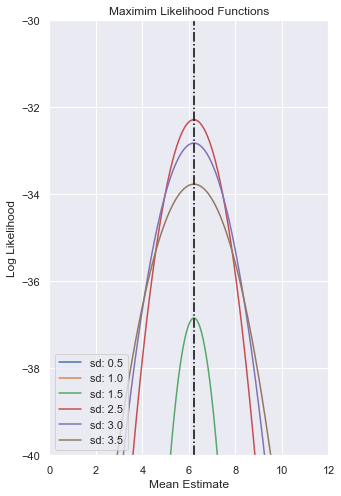

In [38]:
# Plot the Maximum Likelihood Functions for different values of mu 
# and sigma
def plot_ll(x):
    plt.figure(figsize=(5,8))
    plt.title("Maximim Likelihood Functions")
    plt.xlabel("Mean Estimate")
    plt.ylabel("Log Likelihood")
    plt.ylim(-40, -30)
    plt.xlim(0, 12)
    mu_set = np.linspace(0, 16, 1000)
    sd_set = [.5, 1, 1.5, 2.5, 3, 3.5]
    max_val = max_val_location = None
    for i in sd_set:
        ll_array = []
        
        for j in mu_set:
            temp_mm = 0
            
            for k in x:
                temp_mm += np.log(norm.pdf(k, j, i)) # The LL function
            ll_array.append(temp_mm)
        
            if (max_val is None):
                max_val = max(ll_array)
            elif max(ll_array) > max_val:
                max_val = max(ll_array)
                max_val_location = j
        
        # Plot the results
        plt.plot(mu_set, ll_array, label="sd: %.1f" % i)
        
    print ("The max LL for sd %.2f is %.2f" % (i, max(ll_array)))    
    plt.axvline(x=max_val_location, color='black', ls='-.')
    plt.legend(loc='lower left')

plot_ll(X);

In [39]:
print(np.mean(X))
np.std(X)

6.214285714285714


2.425418120907092

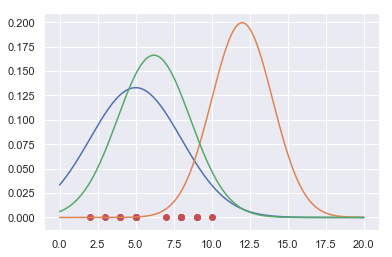

In [40]:
points=np.linspace(0, 20, num=1000)

prob3=lambda x:norm.pdf(x,6.2,2.4)

plt.plot(points,prob1(points))
plt.plot(points,prob2(points))
plt.plot(points,prob3(points))

plt.scatter(X,y,c='r')

## Regularized least squares


The total error function to be minimized takes the following from

$$ E_D(\mathbf{w}) + \lambda \, E_w (\mathbf{w})$$

where $E_w (\mathbf{w})=\frac{1}{2} \mathbf{w}^T \mathbf{w}$ and $\lambda$ is the reguarization coefficent that controls the relative important of the data-dependent error and the regularization term.

The total error function becomes:

$$ \frac{1}{2} \sum_{n=1} ^N \{ t_n - \mathbf{w}^T x_n\}^2 + \lambda \mathbf{w}^T\mathbf{w}$$.



$$ \mathbf{w}= ( \lambda I + X^T X)^1 X^T y $$

### Ridge regression as constrained optimization


One problem with ML estimation is that it can result in overfitting. In this section, we discuss a
way to ameliorate this problem by using MAP estimation with a Gaussian prior. For simplicity,
we assume a Gaussian likelihood, rather than a robust likelihood.


The reason that the MLE can overfit is that it is picking the parameter values that are the
best for modeling the training data; but if the data is noisy, such parameters often result in
complex functions. As a simple example, suppose we fit a degree 14 polynomial to N = 21 data
points using least squares. The resulting curve is very “wiggly”, as shown in Figure 7.7(a). The
corresponding least squares coefficients (excluding w0) are as follows:

This technique is known as ridge regression, or penalized least squares. In general, adding
a Gaussian prior to the parameters of a model to encourage them to be small is called 2
regularization or weight decay. Note that the offset term w0 is not regularized, since this just
affects the height of the function, not its complexity. By penalizing the sum of the magnitudes
of the weights, we ensure the function is simple (since w = 0 corresponds to a straight line,
which is the simplest possible function, corresponding to a constant.)
We illustrate this idea in Figure 7.7, where we see that increasing

/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class

/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
/anaconda3/envs/tez/lib/python3.6/site-packages/ipykernel_launcher.py:21: DeprecationWarning: object of type <class

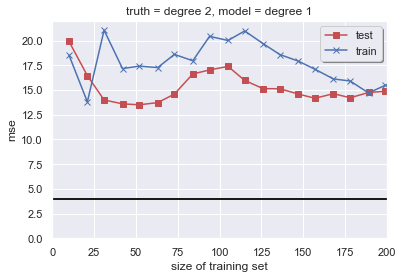

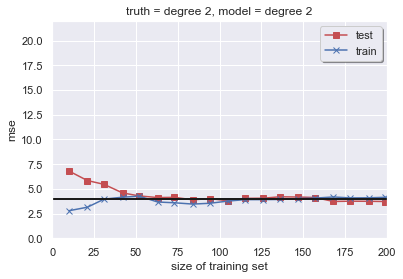

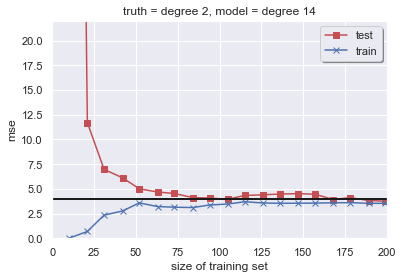

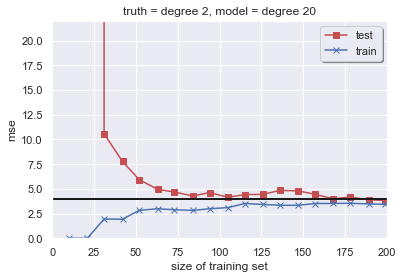

In [41]:

# Based on https://github.com/probml/pmtk3/blob/master/demos/linregPolyVsN.m
import os
#from utils.util import poly_data_make
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import numpy as np


TrueDeg = 2 #The true degree of the model
degrees = [1, 2, 14, 20] #The degrees of our design matrices
    
#Function to expand from x to design matrix of degree deg
def ExpandtoDeg(x,deg):
    return np.array([x**i for i in range(deg+1)]).transpose().reshape(-1,deg+1)

def make_1dregression_data(n=21):
    np.random.seed(0)
    # Example from Romaine Thibaux
    xtrain = np.linspace(0, 20, n)
    xtest = np.arange(0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    # Apply function to make data
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytestNoisefree = fun(xtest)
    ytestNoisy = ytestNoisefree + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytestNoisefree, ytestNoisy, sigma2
    
def make_poly_regression_data(deg=2, n=21):
    np.random.seed(0)
    xtrain = np.linspace(-1, 1, n)
    xtest = np.arange(-1, 1, 0.01)
    sigma2 = 4
    fun = lambda x: (1 + x + np.power(x, deg))
    # Apply function to make data
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytestNoisefree = fun(xtest)
    ytestNoisy = ytestNoisefree + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytestNoisefree, ytestNoisy, sigma2
    
    
for ModDeg in degrees:
    
    ns = np.round(np.linspace(10, 210, 20))
    
    err = []
    errtrain = []
    for n in ns:
        #Forming data
        #xtrain, ytrain, xtest, _, ytest, _ = poly_data_make(sampling='thibaux', deg=TrueDeg, n=n)
        xtrain, ytrain, xtest, _, ytest, _ = make_1dregression_data(n=n)
        #xtrain, ytrain, xtest, _, ytest, _ = make_poly_regression_data(deg=TrueDeg, n=n)
        
        #Rescaling data
        scaler = MinMaxScaler(feature_range=(-1, 1))
        xtrain = scaler.fit_transform(xtrain.reshape(-1, 1))
        xtest = scaler.transform(xtest.reshape(-1, 1))

        #Fitting ridge regression. Small differences in alpha near zero make a visual difference in the plot when n is close to 0.
        regr = Ridge(alpha=0, fit_intercept=False) #Using ridge instead of ordinary least squares for numerical stability
        XDesignTrain = ExpandtoDeg(xtrain, ModDeg)
        XDesignTest = ExpandtoDeg(xtest, ModDeg)
        regr.fit(XDesignTrain,ytrain)   
        ypred = regr.predict(XDesignTest)
        err.append(np.mean((ytest-ypred)**2))
        errtrain.append(np.mean((ytrain-regr.predict(XDesignTrain))**2))
    
    #Plotting
    fig, ax = plt.subplots()
    ax.plot(ns, err, color = 'r', marker = 's',label='test')
    ax.plot(ns, errtrain, marker = 'x', label='train')
    ax.legend(loc='upper right', shadow=True)
    ax.set_xlim([0,200])
    ax.set_ylim([0,22])
    plt.axhline(y=4, color='k', linewidth=2)
    plt.xlabel('size of training set')
    plt.ylabel('mse')
    plt.title('truth = degree {}, model = degree {}'.format(TrueDeg, ModDeg))
    plt.savefig(os.path.join('figures', 'polyfitN{}.pdf'.format(ModDeg)),orientation='landscape')
    plt.draw()

plt.show()

In [42]:
#!/usr/bin/env python

from utils import *
import numpy as np

def default_fit_options(reg_type, D):
    """returns an object with default linear regression fit options
    """
    opts = {}
    opts['Display'] = None
    opts['verbose'] = False
    opts['TolFun'] = 1e-3
    opts['MaxIter'] = 200
    opts['Method'] = 'lbfgs'
    opts['MaxFunEvals'] = 2000
    opts['TolX'] = 1e-3
    if reg_type.lower() == 'l1':
        opts['order'] = -1
        if D > 1000:
            opts['corrections'] = 10
    return opts


def preprocessor_apply_to_train(preproc, X):
    """
    Apply Preprocessor to training data and memorize parameters

    preproc is initially a struct with the following fields [default]

    standardize_X - if True, makes columns of X zero mean and unit var. [True]
    rescale_X - if True, scale columns of X to lie in [-1, +1] [False]
    kernel_fn - if not None, apply kernel fn to X  default [None]

    The returned preproc object has several more fields added to it,
    which are used by  preprocessor_apply_to_test
    """

    # Set defaults
    try:
        preproc.standardize_X
    except AttributeError:
        preproc.standardize_X = True
    try:
        preproc.rescale_X
    except AttributeError:
        preproc.rescale_X = False
    try:
        preproc.kernel_fn
    except AttributeError:
        preproc.kernel_fn = None
    try:
        preproc.poly
    except AttributeError:
        preproc.poly = None
    try:
        preproc.add_ones
    except AttributeError:
        preproc.add_ones = None

    if preproc.standardize_X:
        X, preproc.Xmu = util.center_cols(X)
        X, preproc.Xstnd = util.mk_unit_variance(X)

    if preproc.rescale_X:
        try:
            preproc.Xscale
        except AttributeError:
            preproc.Xscale = [-1, 1]
        X = util.rescale_data(X, preproc.Xscale[0], preproc.Xscale[1])

    if preproc.kernel_fn is not None:
        preproc.basis = X
        X = preproc.kernel_fn(X, preproc.basis)

    if preproc.poly is not None:
        assert preproc.poly > 0, 'polynomial degree must be greater than 0'
        X = util.degexpand(X, preproc.poly, False)

    if preproc.add_ones:
        X = util.add_ones(X)

    return preproc, X


def preprocessor_apply_to_test(preproc, X):
    """Transform the test data in the same way as the training data"""

    try:
        X = util.center_cols(X, preproc.Xmu)
    except AttributeError:
        pass

    try:
        X = util.mk_unit_variance(X, preproc.Xstnd)
    except AttributeError:
        pass

    try:
        X = util.rescale_data(X, preproc.Xscale[0], preproc.Xscale[1])
    except AttributeError:
        pass

    try:
        if preproc.kernel_fn is not None:
            X = preproc.kernel_fn(X, preproc.basis)
    except AttributeError:
        pass

    try:
        if preproc.poly is not None:
            X = util.degexpand(X, preproc.poly, False)
    except AttributeError:
        pass

    try:
        if preproc.add_ones:
            X = util.add_ones(X)
    except AttributeError:
        pass

    return X


def linreg_create():
    pass


def linreg_fit(X, y, **kwargs):
    """
    Fit a linear regression model with MLE or MAP.
    This is a port of linregFit.m from pmtk3.

    :param X: N*D design matrix
    :param y: N*1 response vector
    """
    pp = util.preprocessor_create(add_ones=True, standardize_X=False)  # default

    N = len(X)
    D = 1 if len(X.shape) < 2 else X.shape[1]

    weights = kwargs['weights'] if 'weights' in kwargs else np.ones(N)
    reg_type = kwargs['reg_type'] if 'reg_type' in kwargs else None
    likelihood = kwargs['likelihood'] if 'likelihood' in kwargs else 'gaussian'
    lambda_ = kwargs['lambda_'] if 'lambda_' in kwargs else None
    fit_options = kwargs['fit_options'] if 'fit_options' in kwargs else None
    preproc = kwargs['preproc'] if 'preproc' in kwargs else pp
    fit_fn_name = kwargs['fit_fn_name'] if 'fit_fn_name' in kwargs else None
    winit = kwargs['winit'] if 'winit' in kwargs else None

    if preproc is None:
        preproc = util.preprocessor_create()

    if preproc.add_ones:
        D += 1

    if winit is None:
        winit = np.zeros(D)

    if reg_type is None:
        if lambda_ is None:
            # MLE
            reg_type = 'l2'
            lambda_ = 0
        else:
            #L2
            reg_type = 'l2'

    if fit_options is None:
        fit_options = default_fit_options(reg_type, D)

    if fit_fn_name is None:
        if reg_type.lower() == 'l1':
            fit_fn_name = 'l1GeneralProjection'
        elif reg_type.lower() == 'l2':
            fit_fn_name = 'qr'

    model = {}

    if likelihood.lower() == 'huber':
        raise NotImplementedError
    elif likelihood.lower() == 'student':
        raise NotImplementedError
    elif likelihood.lower() == 'gaussian':
        preproc, X = preprocessor_apply_to_train(preproc, X)
        N = len(X)
        D = 1 if len(X.shape) < 2 else X.shape[1]
        model['lambda_'] = lambda_
        lambda_vec = lambda_ * np.ones(D)

        if preproc.add_ones:
            lambda_vec[0] = 0  # don't penalize bias term

        winit = np.zeros(D)
        opts = fit_options

        if reg_type == 'l1':
            raise NotImplementedError
        elif reg_type == 'l2':
            if fit_fn_name == 'qr':
                if lambda_ == 0:
                    R = np.diag(np.sqrt(weights))
                    RX = R.dot(X)
                    # Attempt tp emulate matlab's w = (R*X) \ (R*y);
                    # Note that backslash operator uses QR, not pinv...
                    w = np.linalg.pinv(RX.T.dot(RX)).dot(RX.T).dot(R.dot(y))
                else:
                    raise NotImplementedError
            elif fit_fn_name == 'minfunc':
                raise NotImplementedError
            else:
                raise ValueError('Invalid fit function')
        elif reg_type == 'scad':
            raise NotImplementedError
        else:
            raise ValueError('Invalid regression type')
    else:
        raise ValueError('Invalid likelihood')

    model['w'] = w
    yhat = X.dot(w)

    if weights.sum() == 0:
        model['sigma2'] = np.spacing(1)
    else:
        model['sigma2'] = np.sum(weights * np.square(y - yhat)) / \
            np.sum(weights)

    model['preproc'] = preproc
    model['model_type'] = 'linreg'
    model['likelihood'] = likelihood

    return model


def linreg_fit_bayes(X, y, **kwargs):
    """
    Fit a Bayesian linear regression model.
    This is a port of linregFit.m from pmtk3.

    :param X: N*D design matrix
    :param y: N*1 response vector
    """
    pp = util.preprocessor_create(add_ones=True, standardize_X=False)  # default

    prior = kwargs['prior'] if 'prior' in kwargs else 'uninf'
    preproc = kwargs['preproc'] if 'preproc' in kwargs else pp
    beta = kwargs['beta'] if 'beta' in kwargs else None
    alpha = kwargs['alpha'] if 'alpha' in kwargs else None
    g = kwargs['g'] if 'g' in kwargs else None
    use_ARD = kwargs['use_ARD'] if 'use_ARD' in kwargs else False
    verbose = kwargs['verbose'] if 'verbose' in kwargs else False

    if prior.lower() == 'eb':
        prior = 'ebnetlab'

    if prior.lower() == 'uninf':
        raise NotImplementedError
    elif prior.lower() == 'gauss':
        raise NotImplementedError
    elif prior.lower() == 'zellner':
        raise NotImplementedError
    elif prior.lower() == 'vb':
        raise NotImplementedError
    elif prior.lower() == 'ebnetlab':
        model, logev = linreg_fit_eb_netlab(X, y, preproc)
    elif prior.lower() == 'ebchen':
        raise NotImplementedError
    else:
        raise ValueError('Invalid prior')

    model['model_type'] = 'linreg_bayes'
    model['prior'] = prior

    return model, logev


def linreg_fit_path_cv():
    pass


def linreg_logprob():
    pass


def linreg_predict(model, X, v=False):
    """
    Prediction with linear regression
    yhat[i] = E[y|X[i, :]], model]
    v[i] = Var[y|X[i, :], model]
    """
    if 'preproc' in model:
        X = preprocessor_apply_to_test(model['preproc'], X)

    yhat = X.dot(model['w'])
    return yhat


def linreg_predict_bayes():
    pass

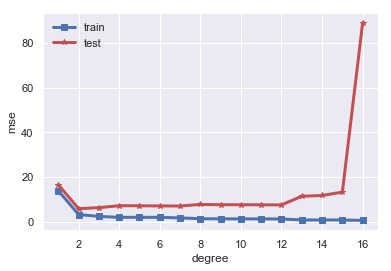

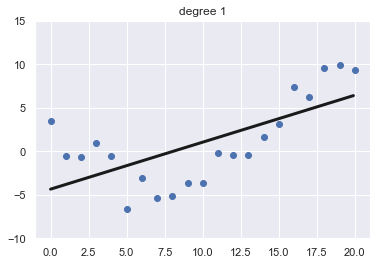

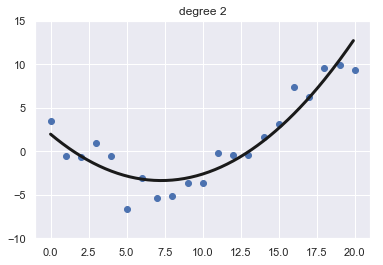

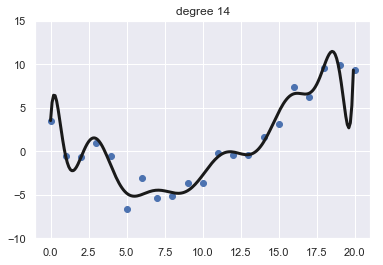

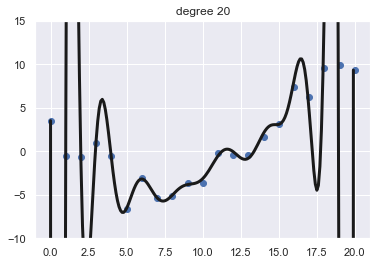

In [43]:

#       Author:    J. Benjamin Cook
#       E-mail:    jbenjamincook@gmail.com
#


# Based on https://github.com/probml/pmtk3/blob/master/demos/linregPolyVsDegree.m

import os
import numpy as np
import matplotlib.pyplot as plt
from utils.util import preprocessor_create
#from utils.util import poly_data_make
from examples.linregPmtkEmulator import linreg_fit
from examples.linregPmtkEmulator import linreg_predict
#from examples.linearRegression import linreg_fit_bayes

def make_1dregression_data(n=21):
    np.random.seed(0)
    # Example from Romaine Thibaux
    xtrain = np.linspace(0, 20, n)
    xtest = np.arange(0, 20, 0.1)
    sigma2 = 4
    w = np.array([-1.5, 1/9.])
    fun = lambda x: w[0]*x + w[1]*np.square(x)
    # Apply function to make data
    ytrain = fun(xtrain) + np.random.normal(0, 1, xtrain.shape) * \
        np.sqrt(sigma2)
    ytestNoisefree = fun(xtest)
    ytestNoisy = ytestNoisefree + np.random.normal(0, 1, xtest.shape) * \
        np.sqrt(sigma2)
    return xtrain, ytrain, xtest, ytestNoisefree, ytestNoisy, sigma2
    
N = 21
#xtrain, ytrain, xtest, _, ytest, _ = poly_data_make(sampling='thibaux', n=N)
xtrain, ytrain, xtest, _, ytest, _ = make_1dregression_data(n=N)


degs = np.arange(1, 22)
Nm = len(degs)

# Plot error vs degree
mseTrain = np.zeros(Nm)
mseTest = np.zeros(Nm)
for m in range(len(degs)):
    deg = degs[m]
    pp = preprocessor_create(rescale_X=True, poly=deg, add_ones=True)
    model = linreg_fit(xtrain, ytrain, preproc=pp)
    ypredTrain = linreg_predict(model, xtrain)
    ypredTest = linreg_predict(model, xtest)
    mseTrain[m] = np.mean(np.square(ytrain - ypredTrain))
    mseTest[m] = np.mean(np.square(ytest - ypredTest))

ndx = degs <= 16
fig = plt.figure()
plt.plot(degs[ndx], mseTrain[ndx], 'bs-', lw=3)
plt.plot(degs[ndx], mseTest[ndx], 'r*-', lw=3)
plt.xlabel('degree')
plt.ylabel('mse')
leg = plt.legend(('train', 'test'), loc='upper left')
leg.draw_frame(False)
plt.savefig(os.path.join('figures','linregPolyVsDegreeUcurve.pdf'))
plt.show()

degs = [1, 2, 14, 20]
mseTrain = np.zeros(len(degs))
mseTest = np.zeros(len(degs))

for m, deg in enumerate(degs):
    pp = preprocessor_create(rescale_X=True, poly=deg, add_ones=True)
    model = linreg_fit(xtrain, ytrain, preproc=pp)
    ypredTrain = linreg_predict(model, xtrain)
    ypredTest = linreg_predict(model, xtest)
    mseTrain[m] = np.mean(np.square(ytrain - ypredTrain))
    mseTest[m] = np.mean(np.square(ytest - ypredTest))

    plt.figure()
    plt.plot(xtrain, ytrain, 'o')
    plt.plot(xtest, ypredTest, 'k', lw=3)
    plt.title("degree %d" % deg)
    plt.xlim([-1, 21])
    #plt.xlim([min(xtest), max(xtest)])
    plt.ylim([-10, 15])
    plt.savefig(os.path.join('figures','polyfitDemo%d.pdf' % deg))
    plt.show()


## Bayesian Learning

### Bayesian Learning for model parameters

+ Given $n$ data $D=X_{1_n}= \{x_1,...,x_n \}$ write down the expression for likelihood

$$ p(D|\Theta)$$ where $\Theta$ is model parameters

+ Specify a prior $p(\Theta)$

+ Compute the posterior $$ p(\Theta | D) = \frac{p(D|\Theta)p(\Theta)}{p(D)}$$

## Note to me.

Maximum Likelihood Estimate at prediction gives always the same sigm
same variance apply to each point

However Baysian anssure that where we have more data
variance will be smaller and where less or no data variance will be high.
Telling us our confident.
